## Imports

In [70]:
# from IPython.core.interactiveshell import InteractiveShell

# InteractiveShell.ast_node_interactivity = "all"

In [86]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

## Original data

In [72]:
carclaims_original = pd.read_csv('../../data/Angoss Knowledge Seeker - carclaims.txt/carclaims_original.csv')

In [73]:
carclaims_original.sample(10)

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,PolicyNumber,RepNumber,Deductible,DriverRating,Days:Policy-Accident,Days:Policy-Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,BasePolicy,FraudFound
9394,Aug,5,Thursday,Mazda,Urban,Wednesday,Sep,1,Male,Married,78,Policy Holder,Sedan - Collision,Sedan,"20,000 to 29,000",9395,1,400,1,more than 30,more than 30,more than 4,more than 7,over 65,No,No,External,1 to 2,no change,1 vehicle,1995,Collision,No
10690,Nov,3,Friday,Pontiac,Urban,Monday,Nov,3,Male,Married,29,Policy Holder,Sedan - Collision,Sedan,"20,000 to 29,000",10691,6,400,2,more than 30,more than 30,1,6 years,31 to 35,No,No,External,none,no change,1 vehicle,1995,Collision,No
2165,Apr,3,Tuesday,Honda,Urban,Thursday,Apr,4,Male,Married,35,Third Party,Sedan - All Perils,Sedan,"20,000 to 29,000",2166,12,400,3,more than 30,more than 30,2 to 4,6 years,31 to 35,No,No,External,3 to 5,no change,1 vehicle,1994,All Perils,No
11901,Apr,5,Saturday,Honda,Urban,Friday,May,1,Male,Married,27,Policy Holder,Sedan - Collision,Sedan,"20,000 to 29,000",11902,10,400,2,more than 30,more than 30,2 to 4,6 years,31 to 35,No,No,External,1 to 2,no change,1 vehicle,1996,Collision,Yes
13230,Dec,3,Friday,Chevrolet,Rural,Wednesday,Dec,4,Male,Single,29,Policy Holder,Sedan - Collision,Sedan,"20,000 to 29,000",13231,7,400,3,more than 30,more than 30,1,5 years,31 to 35,No,No,External,none,4 to 8 years,2 vehicles,1996,Collision,No
9494,Oct,4,Thursday,Toyota,Urban,Wednesday,Nov,1,Male,Married,36,Third Party,Sedan - Collision,Sedan,"20,000 to 29,000",9495,4,400,4,more than 30,more than 30,1,5 years,36 to 40,No,No,External,more than 5,no change,1 vehicle,1995,Collision,No
4487,Dec,2,Thursday,Pontiac,Urban,Monday,Dec,2,Male,Single,48,Policy Holder,Sedan - Collision,Sedan,"less than 20,000",4488,16,400,4,more than 30,more than 30,none,more than 7,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision,No
6369,Jun,2,Wednesday,Chevrolet,Urban,Wednesday,Jun,2,Female,Single,31,Policy Holder,Sedan - Liability,Sport,"20,000 to 29,000",6370,3,400,3,more than 30,more than 30,more than 4,6 years,31 to 35,No,No,External,none,no change,1 vehicle,1995,Liability,No
12737,Mar,4,Sunday,Mazda,Rural,Friday,Apr,1,Male,Married,35,Policy Holder,Sedan - Collision,Sedan,"20,000 to 29,000",12738,10,400,3,more than 30,more than 30,more than 4,6 years,31 to 35,No,No,External,none,no change,1 vehicle,1996,Collision,No
1674,Jan,5,Tuesday,Honda,Urban,Tuesday,Jan,5,Male,Married,44,Policy Holder,Sedan - Liability,Sport,"20,000 to 29,000",1675,9,700,1,more than 30,more than 30,more than 4,7 years,36 to 40,No,No,External,more than 5,no change,1 vehicle,1994,Liability,No


## Clean up

There is only one row with DayOfWeekClaimed and MonthClaimed as 0, for now we can drop it

In [74]:
carclaims_original = carclaims_original.drop(carclaims_original[carclaims_original['DayOfWeekClaimed'] == '0'].index).reset_index()
# carclaims_original.drop(carclaims_original[carclaims_original['Age'] == '0'].index, inplace=True)

In [75]:
carclaims_original[[]] == 0

""
0
1
2
3
4
...
15414
15415
15416
15417


## Encoding

In [76]:
carclaims_original.dtypes

index                    int64
Month                   object
WeekOfMonth              int64
DayOfWeek               object
Make                    object
AccidentArea            object
DayOfWeekClaimed        object
MonthClaimed            object
WeekOfMonthClaimed       int64
Sex                     object
MaritalStatus           object
Age                      int64
Fault                   object
PolicyType              object
VehicleCategory         object
VehiclePrice            object
PolicyNumber             int64
RepNumber                int64
Deductible               int64
DriverRating             int64
Days:Policy-Accident    object
Days:Policy-Claim       object
PastNumberOfClaims      object
AgeOfVehicle            object
AgeOfPolicyHolder       object
PoliceReportFiled       object
WitnessPresent          object
AgentType               object
NumberOfSuppliments     object
AddressChange-Claim     object
NumberOfCars            object
Year                     int64
BasePoli

In [77]:
print(np.sort(carclaims_original['AgeOfPolicyHolder'].unique()))

['16 to 17' '18 to 20' '21 to 25' '26 to 30' '31 to 35' '36 to 40'
 '41 to 50' '51 to 65' 'over 65']


### Label encoding

In [78]:
column_labels = {
    'Month': ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
    'DayOfWeek': ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
    'DayOfWeekClaimed': ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
    'MonthClaimed': ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
    'AgeOfPolicyHolder': np.sort(carclaims_original['AgeOfPolicyHolder'].unique()),
    'NumberOfSuppliments': ['none', '1 to 2', '3 to 5', 'more than 5'],
    'AddressChange-Claim': ['no change', 'under 6 months', '1 year', '2 to 3 years', '4 to 8 years'],
    'NumberOfCars': np.sort(carclaims_original['NumberOfCars'].unique()),
    'VehiclePrice': ['less than 20,000', '20,000 to 29,000', '30,000 to 39,000', '40,000 to 59,000', '60,000 to 69,000', 'more than 69,000'],
    'Days:Policy-Accident': ['none', '1 to 7', '15 to 30', '8 to 15', 'more than 30'],
    'Days:Policy-Claim': ['15 to 30', '8 to 15', 'more than 30'],
    'PastNumberOfClaims': ['none', '1', '2 to 4', 'more than 4'],
    'AgeOfVehicle': ['new', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', 'more than 7'],
    'Make': np.sort(carclaims_original['Make'].unique())
}

In [79]:
for column, labels  in column_labels.items():
    le = LabelEncoder()
    le.fit(labels)
    carclaims_original[column] = le.transform(carclaims_original[column])

In [80]:
carclaims_original

,index,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,PolicyNumber,RepNumber,Deductible,DriverRating,Days:Policy-Accident,Days:Policy-Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,BasePolicy,FraudFound
0,0,2,5,6,6,Urban,5,4,1,Female,Single,21,Policy Holder,Sport - Liability,Sport,5,1,12,300,1,3,2,3,1,3,No,No,External,3,0,2,1994,Liability,No
1,1,4,3,6,6,Urban,1,4,4,Male,Single,34,Policy Holder,Sport - Collision,Sport,5,2,15,400,4,3,2,3,4,4,Yes,No,External,3,3,0,1994,Collision,No
2,2,10,5,0,6,Urban,4,9,2,Male,Married,47,Policy Holder,Sport - Collision,Sport,5,3,7,400,3,3,2,0,5,6,No,No,External,3,3,0,1994,Collision,No
3,3,6,2,2,17,Rural,0,5,1,Male,Married,65,Third Party,Sedan - Liability,Sport,0,4,4,400,2,3,2,0,6,7,Yes,No,External,2,3,0,1994,Liability,No
4,4,4,5,1,6,Urban,5,3,2,Female,Single,27,Third Party,Sport - Collision,Sport,5,5,3,400,1,3,2,3,3,4,No,No,External,3,3,0,1994,Collision,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15414,15415,9,4,0,17,Urban,5,9,5,Male,Married,35,Policy Holder,Sedan - Collision,Sedan,0,15416,5,400,4,3,2,1,4,4,No,No,External,3,3,0,1996,Collision,Yes
15415,15416,9,5,4,13,Urban,0,2,1,Male,Married,30,Policy Holder,Sedan - Liability,Sport,1,15417,11,400,3,3,2,2,4,4,No,No,External,2,3,2,1996,Liability,No
15416,15417,9,5,4,17,Rural,0,2,1,Male,Single,24,Policy Holder,Sedan - Collision,Sedan,0,15418,4,400,4,3,2,2,3,3,No,No,External,0,3,0,1996,Collision,Yes
15417,15418,2,1,1,17,Urban,4,2,2,Female,Married,34,Third Party,Sedan - All Perils,Sedan,0,15419,6,400,4,3,2,3,0,4,No,No,External,2,3,0,1996,All Perils,No


### One Hot Encoding

In [ ]:
columns_one_hot = ['AccidentArea', 'Sex', 'MaritalStatus', 'PoliceReportFiled', 'WitnessPresent', 'AgentType', 'BasePolicy', 'Fault', 'PolicyType', 'VehicleCategory']

In [82]:
ohe = OneHotEncoder(sparse_output=False, drop='first')
encoded_nominal = ohe.fit_transform(carclaims_original[columns_one_hot])
carclaims_original.drop(columns=columns_one_hot, axis=1, inplace=True)
carclaims_original = pd.concat([carclaims_original, pd.DataFrame(encoded_nominal, columns=ohe.get_feature_names_out(columns_one_hot))], axis=1)

In [83]:
X = carclaims_original.drop('FraudFound', axis=1)
y = carclaims_original['FraudFound']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [84]:
X

,index,Month,WeekOfMonth,DayOfWeek,Make,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Age,VehiclePrice,PolicyNumber,RepNumber,Deductible,DriverRating,Days:Policy-Accident,Days:Policy-Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,AccidentArea_Urban,Sex_Male,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Widow,PoliceReportFiled_Yes,WitnessPresent_Yes,AgentType_Internal,BasePolicy_Collision,BasePolicy_Liability,Fault_Third Party,PolicyType_Sedan - Collision,PolicyType_Sedan - Liability,PolicyType_Sport - All Perils,PolicyType_Sport - Collision,PolicyType_Sport - Liability,PolicyType_Utility - All Perils,PolicyType_Utility - Collision,PolicyType_Utility - Liability,VehicleCategory_Sport,VehicleCategory_Utility
0,0,2,5,6,6,5,4,1,21,5,1,12,300,1,3,2,3,1,3,3,0,2,1994,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,1,4,3,6,6,1,4,4,34,5,2,15,400,4,3,2,3,4,4,3,3,0,1994,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2,10,5,0,6,4,9,2,47,5,3,7,400,3,3,2,0,5,6,3,3,0,1994,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,3,6,2,2,17,0,5,1,65,0,4,4,400,2,3,2,0,6,7,2,3,0,1994,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,4,4,5,1,6,5,3,2,27,5,5,3,400,1,3,2,3,3,4,3,3,0,1994,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15414,15415,9,4,0,17,5,9,5,35,0,15416,5,400,4,3,2,1,4,4,3,3,0,1996,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15415,15416,9,5,4,13,0,2,1,30,1,15417,11,400,3,3,2,2,4,4,2,3,2,1996,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
15416,15417,9,5,4,17,0,2,1,24,0,15418,4,400,4,3,2,2,3,3,0,3,0,1996,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15417,15418,2,1,1,17,4,2,2,34,0,15419,6,400,4,3,2,3,0,4,2,3,0,1996,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [102]:
tsne_model = TSNE(learning_rate=1000)

tsne_features = tsne_model.fit_transform(X)

In [103]:
tsne_features

array([[-100.2116  ,  -45.146263],
       [-100.95596 ,  -45.26325 ],
       [-101.31939 ,  -45.63303 ],
       ...,
       [ 130.82693 ,  -17.764143],
       [ 131.01028 ,  -17.676186],
       [ 130.81909 ,  -17.85591 ]], dtype=float32)

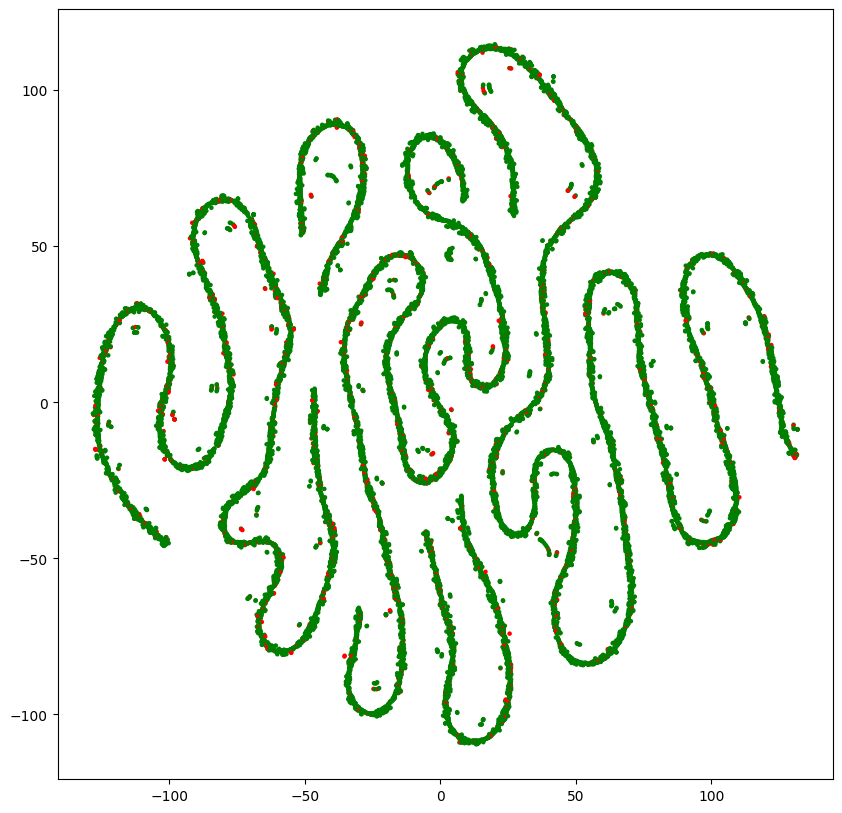

In [107]:
plt.figure(figsize=(10, 10))
plt.scatter(tsne_features[:,0], tsne_features[:,1], c=y.map({'Yes': 'red', 'No': 'green'}), s=5)
plt.show()